# Figure SI 7 and SI 8

In [5]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm

# Import functions
%matplotlib inline

# Plotting params

In [6]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 7,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Function to load data

In [7]:
def data_dict_from_pkl(DataName):
    FolderPath = os.getcwd()
    DataFilePath = os.path.join(FolderPath,DataName)
    
    DataFile = open(DataFilePath, 'rb')
    Data = pickle.load(DataFile, encoding = 'latin1')
    DataFile.close()

    return Data

# Load the data

In [8]:
dataset_list_xy = data_dict_from_pkl('01_dataset_xy.pkl')
dataset_list_z = data_dict_from_pkl('01_dataset_z.pkl')

# Define carbon ms0 and ms1 frequencies

In [9]:
C_freq_dict = {}
C_freq_dict['C1'] = {}
C_freq_dict['C1']['ms0'] = 431957.298
C_freq_dict['C1']['ms1'] = 469011.306

C_freq_dict['C2'] = {}
C_freq_dict['C2']['ms0'] = 431958.559
C_freq_dict['C2']['ms1'] = 413466.286

C_freq_dict['C5'] = {}
C_freq_dict['C5']['ms0'] = 431951.79
C_freq_dict['C5']['ms1'] = 408323.802

data_qbt = 'C5'
data_ms0_freq = C_freq_dict[data_qbt]['ms0']
data_ms1_freq = C_freq_dict[data_qbt]['ms1']

# SI Figure 7

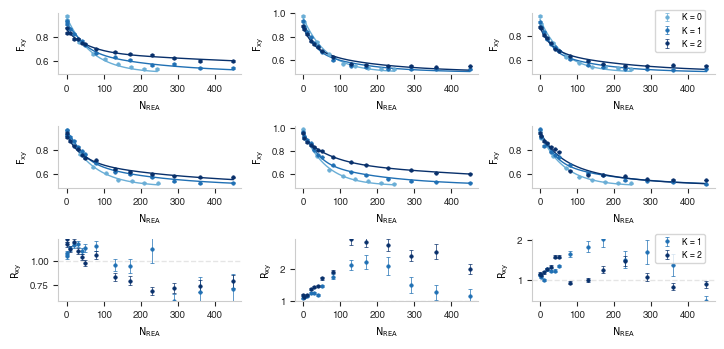

In [10]:
fig_multiplier = 1
fig, ax = plt.subplots(3,3, figsize = (18.3/2.54*1*fig_multiplier,8.9/2.54*fig_multiplier))#,constrained_layout=True)

find_RO_Str = '{C_{RO}}$:'
for N_column in range(len(dataset_list_xy[0])):
    for N_row in range(len(dataset_list_xy)-1): # No loop iteration for the R_dict, hence the -1

        dataset = dataset_list_xy[N_row][N_column]

        dataset_keys = list(dataset.keys())
        N_datasets = len(dataset_keys)
        color_list = cm.Blues(np.linspace(0.5,1,N_datasets)) # ['k','r','b']
        
        for cntr, key in enumerate(dataset_keys):
        
            # Extract the amount of spectator qubits
            C_RO_str_Idx = key.find(find_RO_Str) + len(find_RO_Str) + 1
            C_RO_str = key[C_RO_str_Idx::]
            N_spectator = C_RO_str.count('C') - 1
        
            # Define a label for the axes legend
            # label = r'$\mathrm{N_{spec}}$ = ' + str(N_spectator)
            label = r'K = ' + str(N_spectator)
        
            x_xy_data = dataset[key]['x']
            xmax = np.max(x_xy_data)
            y_xy_data = dataset[key]['y']
            yerr_xy_data = dataset[key]['yerr']
            x_fit_xy = dataset[key]['x_fit_xy']
            y_fit_xy = dataset[key]['y_fit_xy']
        
            ax[N_row, N_column].errorbar(x_xy_data, y_xy_data, yerr_xy_data, color = color_list[cntr], linestyle = 'none', marker = 'o', label = label,\
                           markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
            ax[N_row, N_column].plot(x_fit_xy, y_fit_xy, color = color_list[cntr], linewidth = linewidth_default*fig_multiplier)

        ax[N_row, N_column].set_xlim([-0.05*xmax, 1.05*xmax])
        ax[N_row, N_column].set_xlabel(r'$\mathrm{N_{REA}}$')
        ax[N_row, N_column].set_ylabel(r'$\mathrm{F_{xy}}$')
        ax[N_row, N_column].spines['right'].set_visible(False)
        ax[N_row, N_column].spines['top'].set_visible(False)
        
        
    dataset_R_dict = dataset_list_xy[2][N_column]  
    N_spectators_R_dict_list = np.array(list(dataset_R_dict.keys()))
    
    color_list_ratio = cm.Blues(np.linspace(0.5,1,len(N_spectators_R_dict_list))) # ['k','r','b']
    
    ylim_max = 1
    ylim_min = 1
    for N_spectator in N_spectators_R_dict_list:
        if N_spectator != 0:
            addstring = str(N_spectator) + 'spec'

            N_LDE = dataset_R_dict[N_spectator]['ratio']['x_xy']
            R_xy = dataset_R_dict[N_spectator]['ratio']['y_xy']
            R_xy_err = dataset_R_dict[N_spectator]['ratio']['yerr_xy']
        
            label = r'K = ' + str(N_spectator)
        
            color = color_list_ratio[N_spectator]
            ax[2,N_column].errorbar( N_LDE, R_xy, R_xy_err, marker = 'o', linestyle = 'none', label = label, color = color, \
                           markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)

            ylim_max_lst = [ylim_max, np.max(R_xy)]
            ylim_max = np.max(ylim_max_lst)
            ylim_min_lst = [ylim_min, np.min(R_xy)]
            ylim_min = np.min(ylim_min_lst)
    

    ax[2,N_column].axhline(y=1, linestyle = '--', color = 'k', alpha = 0.1, linewidth = linewidth_default*fig_multiplier)
    ax[2,N_column].spines['right'].set_visible(False)
    ax[2,N_column].spines['top'].set_visible(False)
    ax[2,N_column].set_xlabel(r'$\mathrm{N_{REA}}$')
    ax[2,N_column].set_ylabel(r'$\mathrm{R_{xy}}$')
    ax[2,N_column].set_ylim([ylim_min, ylim_max])


ax[0, 2].legend(loc = 'lower left', bbox_to_anchor=(0.65,0.30, 0.5, 0.5), fontsize = 6)
ax[2, 2].legend(loc = 'lower left', bbox_to_anchor=(0.65,0.55, 0.5, 0.5), fontsize = 6)

plt.tight_layout()

# FolderPath = r'...' 
# FigName = 'SI_Fig7.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)

# SI Figure 8

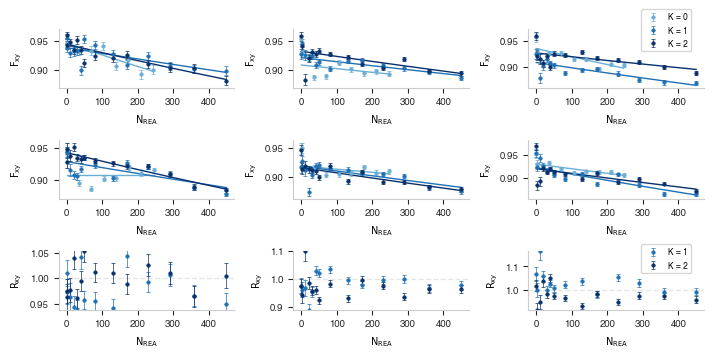

In [11]:
fig_multiplier = 1
fig, ax = plt.subplots(3,3, figsize = (18.3/2.54*1*fig_multiplier,8.9/2.54*fig_multiplier))#,constrained_layout=True)

find_RO_Str = '{C_{RO}}$:'
for N_column in range(len(dataset_list_z[0])):
    for N_row in range(len(dataset_list_z)-1): # No loop iteration for the R_dict, hence the -1

        dataset = dataset_list_z[N_row][N_column]

        dataset_keys = list(dataset.keys())
        N_datasets = len(dataset_keys)
        color_list = cm.Blues(np.linspace(0.5,1,N_datasets)) # ['k','r','b']
        
        for cntr, key in enumerate(dataset_keys):
        
            # Extract the amount of spectator qubits
            C_RO_str_Idx = key.find(find_RO_Str) + len(find_RO_Str) + 1
            C_RO_str = key[C_RO_str_Idx::]
            N_spectator = C_RO_str.count('C') - 1
        
            # Define a label for the axes legend
            # label = r'$\mathrm{N_{spec}}$ = ' + str(N_spectator)
            label = r'K = ' + str(N_spectator)
        
            x_z_data = dataset[key]['x']
            xmax = np.max(x_z_data)
            y_z_data = dataset[key]['y']
            yerr_z_data = dataset[key]['yerr']
            x_fit_z = dataset[key]['x_fit_z']
            y_fit_z = dataset[key]['y_fit_z']
        
            ax[N_row, N_column].errorbar(x_z_data, y_z_data, yerr_z_data, color = color_list[cntr], linestyle = 'none', marker = 'o', label = label,\
                           markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)
            ax[N_row, N_column].plot(x_fit_z, y_fit_z, color = color_list[cntr], linewidth = linewidth_default*fig_multiplier)

        ax[N_row, N_column].set_xlim([-0.05*xmax, 1.05*xmax])
        ax[N_row, N_column].set_xlabel(r'$\mathrm{N_{REA}}$')
        ax[N_row, N_column].set_ylabel(r'$\mathrm{F_{xy}}$')
        ax[N_row, N_column].spines['right'].set_visible(False)
        ax[N_row, N_column].spines['top'].set_visible(False)
        
    dataset_R_dict = dataset_list_z[2][N_column]  
    N_spectators_R_dict_list = np.array(list(dataset_R_dict.keys()))
    
    color_list_ratio = cm.Blues(np.linspace(0.5,1,len(N_spectators_R_dict_list))) # ['k','r','b']
    
    ylim_max = 1
    ylim_min = 1
    for N_spectator in N_spectators_R_dict_list:
        if N_spectator != 0:
            addstring = str(N_spectator) + 'spec'

            N_LDE = dataset_R_dict[N_spectator]['ratio']['x_z']
            R_z = dataset_R_dict[N_spectator]['ratio']['y_z']
            R_z_err = dataset_R_dict[N_spectator]['ratio']['yerr_z']
        
            label = r'K = ' + str(N_spectator)
        
            color = color_list_ratio[N_spectator]
            ax[2,N_column].errorbar( N_LDE, R_z, R_z_err, marker = 'o', linestyle = 'none', label = label, color = color, \
                           markersize = markersize_default*fig_multiplier, elinewidth = elinewidht_default*fig_multiplier, capsize = capsize_default*fig_multiplier, markeredgewidth = markeredgewidth_default*fig_multiplier)

            ylim_max_lst = [ylim_max, np.max(R_z)]
            ylim_max = np.max(ylim_max_lst)
            ylim_min_lst = [ylim_min, np.min(R_z)]
            ylim_min = np.min(ylim_min_lst)
    

    ax[2,N_column].axhline(y=1, linestyle = '--', color = 'k', alpha = 0.1, linewidth = linewidth_default*fig_multiplier)
    ax[2,N_column].spines['right'].set_visible(False)
    ax[2,N_column].spines['top'].set_visible(False)
    ax[2,N_column].set_xlabel(r'$\mathrm{N_{REA}}$')
    ax[2,N_column].set_ylabel(r'$\mathrm{R_{xy}}$')
    ax[2,N_column].set_ylim([ylim_min, ylim_max])


ax[0, 2].legend(loc = 'lower left', bbox_to_anchor=(0.62,0.55, 0.5, 0.5), fontsize = 6)
ax[2, 2].legend(loc = 'lower left', bbox_to_anchor=(0.62,0.55, 0.5, 0.5), fontsize = 6)

plt.tight_layout()

# FolderPath = r'...' 
# FigName = 'SI_Fig8.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)